# Introduction:
The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months. The data are stored in the CardioGoodFitness.csv file. The team identifies the following customer variables to study:
* Product purchased, TM195, TM498, or TM798
* Gender
* Age in years
* Education, in years
* Relationship status, single or partnered
* Annual household income ($)
* Average number of times the customer plans to use the treadmill each week 
* Average number of miles the customer expects to walk/run each week
* Self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape. 
## Task:
Perform descriptive analytics to create a customer profile for each CardioGood Fitness treadmill product line.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = "C:/Users/Abdulrhman Alsir/Desktop/Data Science/Data/CardioGoodFitness.csv"
df = pd.read_csv(path)

In [4]:
df.head(15)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
5,TM195,20,Female,14,Partnered,3,3,32973,66
6,TM195,21,Female,14,Partnered,3,3,35247,75
7,TM195,21,Male,13,Single,3,3,32973,85
8,TM195,21,Male,15,Single,5,4,35247,141
9,TM195,21,Female,15,Partnered,2,3,37521,85


In [5]:
df.describe(include='all')
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [6]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [7]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [8]:
tm195_data = df[df['Product'] == 'TM195']
tm498_data = df[df['Product'] == 'TM498']
tm798_data = df[df['Product'] == 'TM798']

In [9]:
mean_age = df.groupby('Product')['Age'].mean()
mean_age

Product
TM195    28.55
TM498    28.90
TM798    29.10
Name: Age, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0.98, 'Age Distribution Across Different Products')

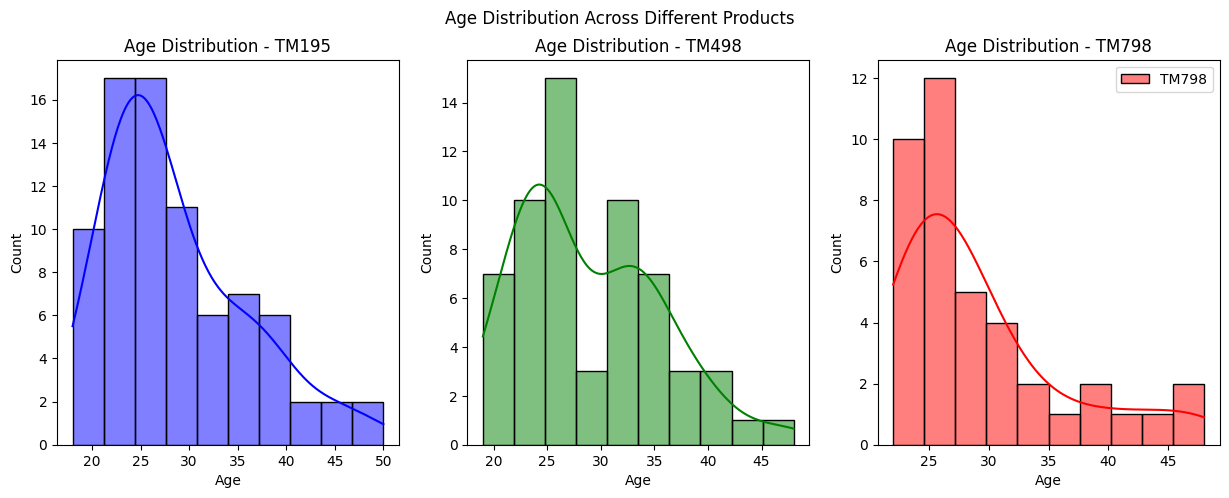

In [103]:
fig, axs = plt.subplots(1,3, figsize=(15, 5))

sns.histplot(data=tm195_data, x='Age', kde=True, bins=10, color='blue', label='TM195', ax=axs[0])
axs[0].set_title('Age Distribution - TM195')
plt.legend()

sns.histplot(data=tm498_data, x='Age', kde=True, bins=10, color='green', label='TM498', ax=axs[1])
axs[1].set_title('Age Distribution - TM498')
plt.legend()

sns.histplot(data=tm798_data, x='Age', kde=True, bins=10, color='red', label='TM798', ax=axs[2])
axs[2].set_title('Age Distribution - TM798')
plt.legend()
plt.suptitle('Age Distribution Across Different Products')

C:\Users\Abdulrhman Alsir\AppData\Local\Temp\ipykernel_12956\3038910950.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Product', y='Income', palette='Set1')


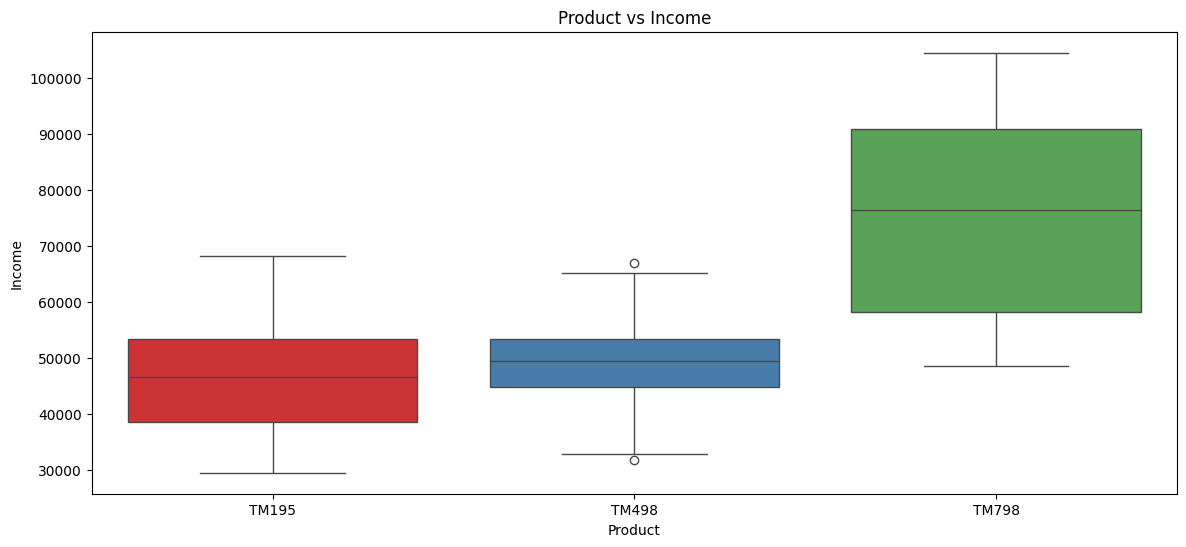

In [11]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='Product', y='Income', palette='Set1')
plt.xlabel('Product')
plt.ylabel('Income')
plt.title('Product vs Income')

plt.show()

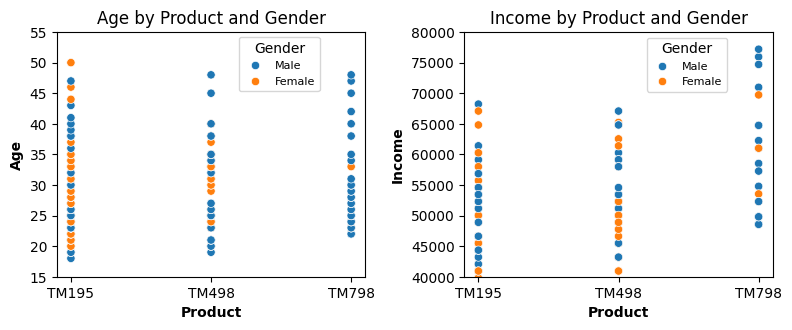

In [12]:
plt.figure(figsize=(12,6))
plt.subplot(2,3,1)
sns.scatterplot(data=df, x='Product', y='Age', hue='Gender', marker='o')
plt.xlabel('Product', fontweight='bold')
plt.ylabel('Age', fontweight='bold')
plt.title('Age by Product and Gender')
plt.ylim(15,55)
plt.legend(title='Gender', fontsize= 8, loc='center right', bbox_to_anchor= (0.87, 0.87))

plt.subplot(2,3,2)
sns.scatterplot(data=df, x='Product', y='Income', hue='Gender', marker='o')
plt.xlabel('Product', fontweight='bold')
plt.ylabel('Income', fontweight='bold')
plt.title('Income by Product and Gender')
plt.ylim(40000,80000)
plt.legend(title='Gender', fontsize= 8, loc="best", bbox_to_anchor= (0.87, 1))

plt.tight_layout()
plt.show()

In [13]:
grouped = df.groupby(['Product', 'Gender']).agg({"Age" : 'mean', 'Income' : 'mean'})
grouped

Age        Income
Product Gender                         
TM195   Female  28.450000  46020.075000
        Male    28.650000  46815.975000
TM498   Female  29.103448  49336.448276
        Male    28.709677  48634.258065
TM798   Female  27.000000  73633.857143
        Male    29.545455  75825.030303

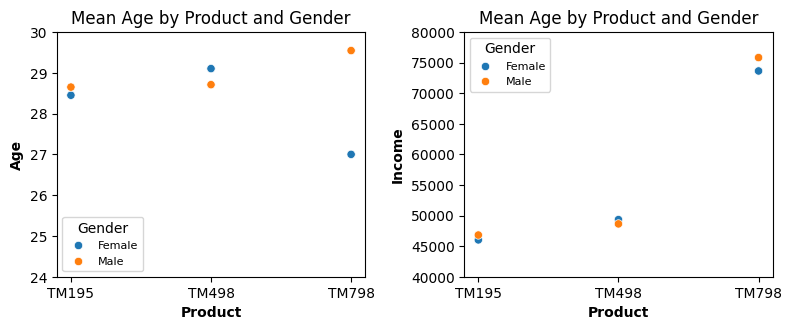

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(2,3,1)
sns.scatterplot(data=grouped, x='Product', y='Age', hue='Gender', marker='o')
plt.xlabel('Product', fontweight='bold')
plt.ylabel('Age', fontweight='bold')
plt.title('Mean Age by Product and Gender')
plt.ylim(24,30)
plt.legend(title='Gender', fontsize= 8)

plt.subplot(2,3,2)
sns.scatterplot(data=grouped, x='Product', y='Income', hue='Gender', marker='o')
plt.xlabel('Product', fontweight='bold')
plt.ylabel('Income', fontweight='bold')
plt.title('Mean Age by Product and Gender')
plt.ylim(40000,80000)
plt.legend(title='Gender', fontsize= 8)

plt.tight_layout()
plt.show()

In [15]:
relation_data = df.groupby(["MaritalStatus", 'Product']).size().reset_index(name='Count')
relation_data

,MaritalStatus,Product,Count
0,Partnered,TM195,48
1,Partnered,TM498,36
2,Partnered,TM798,23
3,Single,TM195,32
4,Single,TM498,24
5,Single,TM798,17


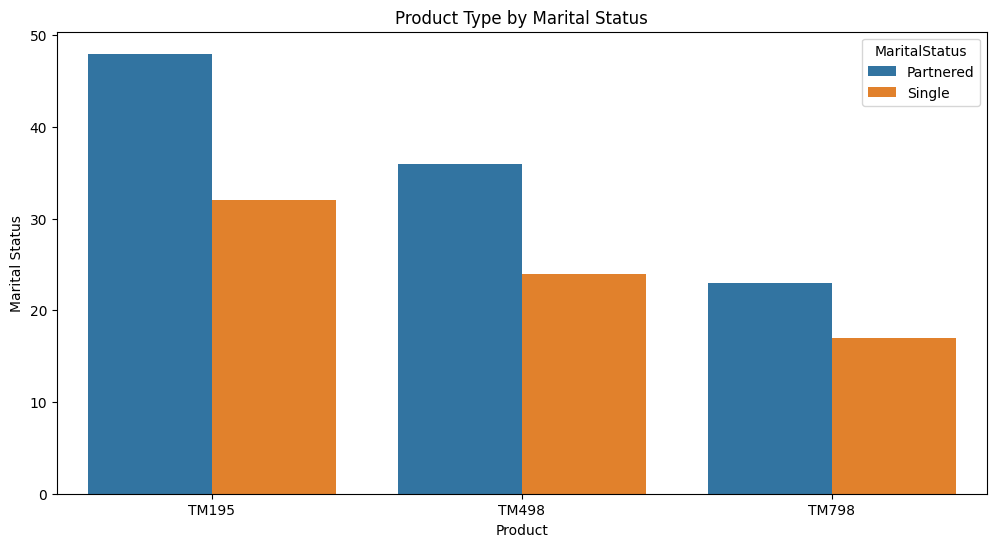

In [16]:
plt.figure(figsize=(12, 6))

sns.barplot(data=relation_data, x='Product', y='Count', hue='MaritalStatus')
plt.xlabel('Product')
plt.ylabel('Marital Status')
plt.title('Product Type by Marital Status')
plt.show()

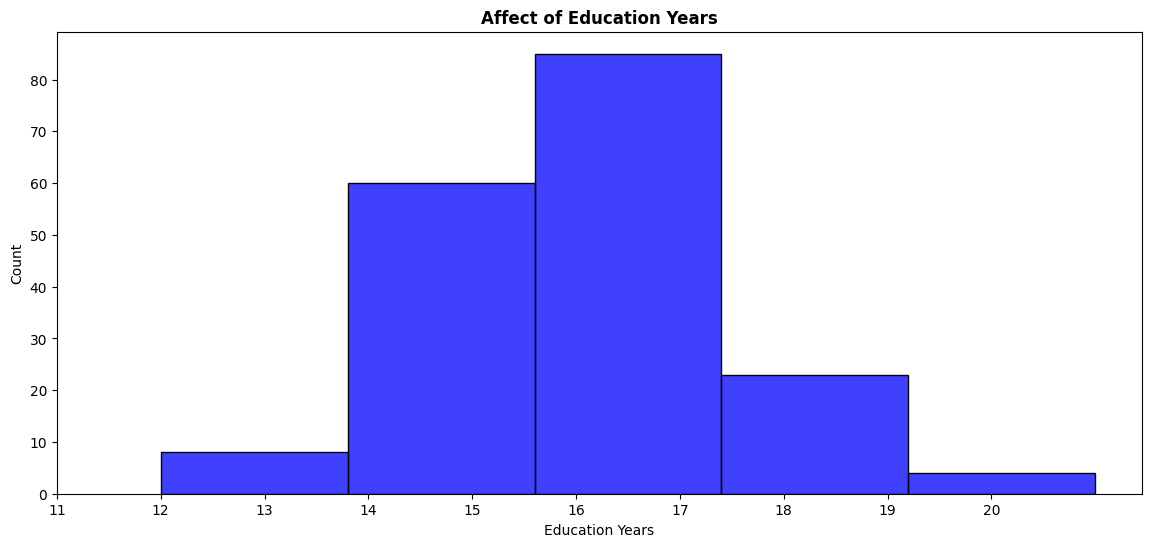

In [44]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='Education', bins=5, kde=False, color='blue')
plt.xlabel('Education Years')
plt.xticks(np.arange(11, 21, 1))
plt.title('Affect of Education Years', fontweight='bold')
plt.show()

In [151]:
gender_data = df.groupby('Product')['Gender'].value_counts().reset_index()
gender_data

,Product,Gender,count
0,TM195,Female,40
1,TM195,Male,40
2,TM498,Male,31
3,TM498,Female,29
4,TM798,Male,33
5,TM798,Female,7


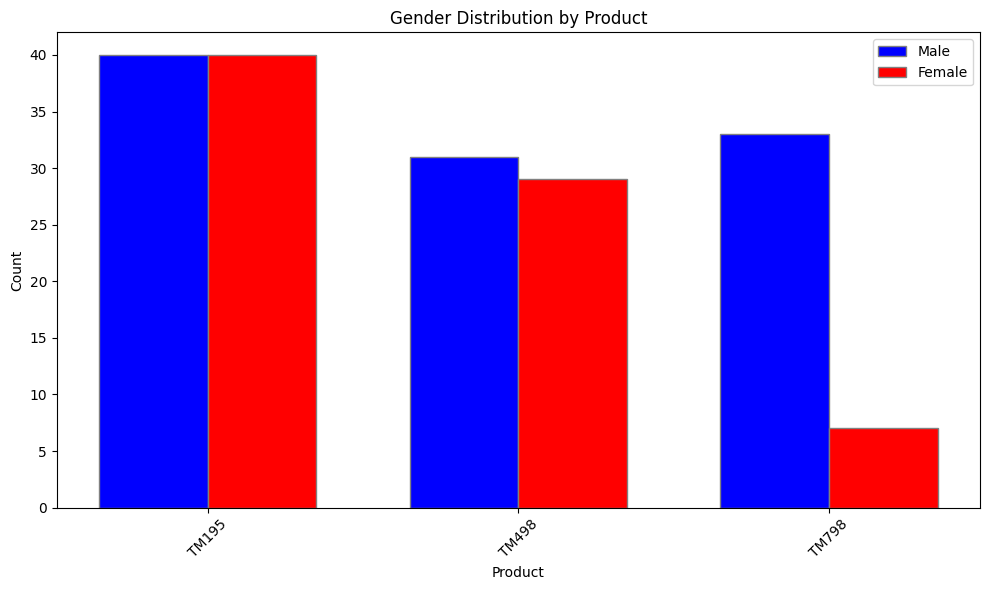

In [152]:
products = gender_data['Product'].unique()
male_counts = gender_data[gender_data['Gender'] == 'Male']['count']
female_counts = gender_data[gender_data['Gender'] == 'Female']['count']

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35

r1 = range(len(products))
r2 = [x + bar_width for x in r1]

ax.bar(r1, male_counts, color='b', width=bar_width, edgecolor='grey', label='Male')
ax.bar(r2, female_counts, color='r', width=bar_width, edgecolor='grey', label='Female')

ax.set_xlabel('Product')
ax.set_ylabel('Count')
ax.set_title('Gender Distribution by Product')
ax.set_xticks([r + bar_width / 2 for r in r1])
ax.set_xticklabels(products)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [105]:
summary_stats = tm195_data.describe()
summary_stats

,Age,Education,Usage,Fitness,Income,Miles
count,80.000000,80.000000,80.000000,80.00000,80.00000,80.000000
mean,28.550000,15.037500,3.087500,2.96250,46418.02500,82.787500
std,7.221452,1.216383,0.782624,0.66454,9075.78319,28.874102
min,18.000000,12.000000,2.000000,1.00000,29562.00000,38.000000
25%,23.000000,14.000000,3.000000,3.00000,38658.00000,66.000000
50%,26.000000,16.000000,3.000000,3.00000,46617.00000,85.000000
75%,33.000000,16.000000,4.000000,3.00000,53439.00000,94.000000
max,50.000000,18.000000,5.000000,5.00000,68220.00000,188.000000


In [109]:
gender_counts = tm195_data['Gender'].value_counts()
gender_counts


Gender
Male      40
Female    40
Name: count, dtype: int64

In [110]:
marital_counts = tm195_data['MaritalStatus'].value_counts()
marital_counts

MaritalStatus
Partnered    48
Single       32
Name: count, dtype: int64

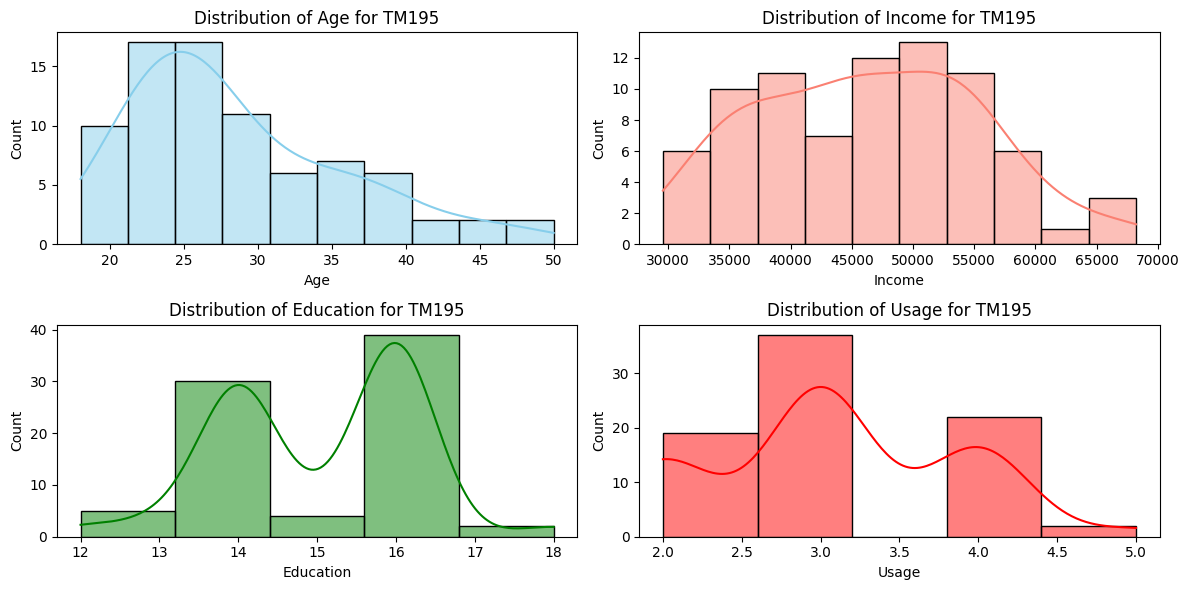

In [129]:
# Step 3: Visualize Data
plt.figure(figsize=(12, 6))

# Example histograms for Age and Income
plt.subplot(2, 2, 1)
sns.histplot(tm195_data['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Age for TM195')

plt.subplot(2, 2, 2)
sns.histplot(tm195_data['Income'], bins=10, kde=True, color='salmon')
plt.title('Distribution of Income for TM195')

plt.subplot(2, 2, 3)
sns.histplot(tm195_data['Education'], bins=5, kde=True, color='green')
plt.title('Distribution of Education for TM195')

plt.subplot(2, 2, 4)
sns.histplot(tm195_data['Usage'], bins=5, kde=True, color='red')
plt.title('Distribution of Usage for TM195')

plt.tight_layout()
plt.show()

In [112]:
summary_stats = tm498_data.describe()
summary_stats

,Age,Education,Usage,Fitness,Income,Miles
count,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000
mean,28.900000,15.116667,3.066667,2.90000,48973.650000,87.933333
std,6.645248,1.222552,0.799717,0.62977,8653.989388,33.263135
min,19.000000,12.000000,2.000000,1.00000,31836.000000,21.000000
25%,24.000000,14.000000,3.000000,3.00000,44911.500000,64.000000
50%,26.000000,16.000000,3.000000,3.00000,49459.500000,85.000000
75%,33.250000,16.000000,3.250000,3.00000,53439.000000,106.000000
max,48.000000,18.000000,5.000000,4.00000,67083.000000,212.000000


In [113]:
gender_counts = tm498_data['Gender'].value_counts()
gender_counts


Gender
Male      31
Female    29
Name: count, dtype: int64

In [114]:
marital_counts = tm498_data['MaritalStatus'].value_counts()
marital_counts

MaritalStatus
Partnered    36
Single       24
Name: count, dtype: int64

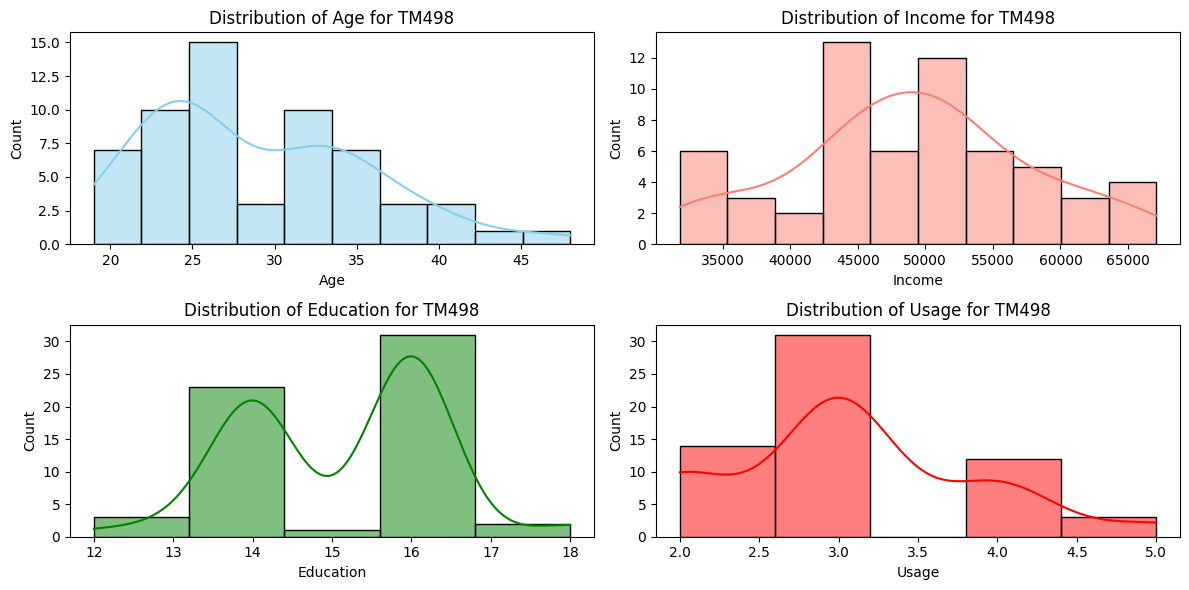

In [130]:
# Step 3: Visualize Data
plt.figure(figsize=(12, 6))

# Example histograms for Age and Income
plt.subplot(2, 2, 1)
sns.histplot(tm498_data['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Age for TM498')

plt.subplot(2, 2, 2)
sns.histplot(tm498_data['Income'], bins=10, kde=True, color='salmon')
plt.title('Distribution of Income for TM498')

plt.subplot(2, 2, 3)
sns.histplot(tm498_data['Education'], bins=5, kde=True, color='green')
plt.title('Distribution of Education for TM498')

plt.subplot(2, 2, 4)
sns.histplot(tm498_data['Usage'], bins=5, kde=True, color='red')
plt.title('Distribution of Usage for TM498')

plt.tight_layout()
plt.show()

In [116]:
summary_stats = tm798_data.describe()
summary_stats

,Age,Education,Usage,Fitness,Income,Miles
count,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000
mean,29.100000,17.325000,4.775000,4.625000,75441.57500,166.900000
std,6.971738,1.639066,0.946993,0.667467,18505.83672,60.066544
min,22.000000,14.000000,3.000000,3.000000,48556.00000,80.000000
25%,24.750000,16.000000,4.000000,4.000000,58204.75000,120.000000
50%,27.000000,18.000000,5.000000,5.000000,76568.50000,160.000000
75%,30.250000,18.000000,5.000000,5.000000,90886.00000,200.000000
max,48.000000,21.000000,7.000000,5.000000,104581.00000,360.000000


In [117]:
gender_counts = tm798_data['Gender'].value_counts()
gender_counts


Gender
Male      33
Female     7
Name: count, dtype: int64

In [118]:
marital_counts = tm798_data['MaritalStatus'].value_counts()
marital_counts

MaritalStatus
Partnered    23
Single       17
Name: count, dtype: int64

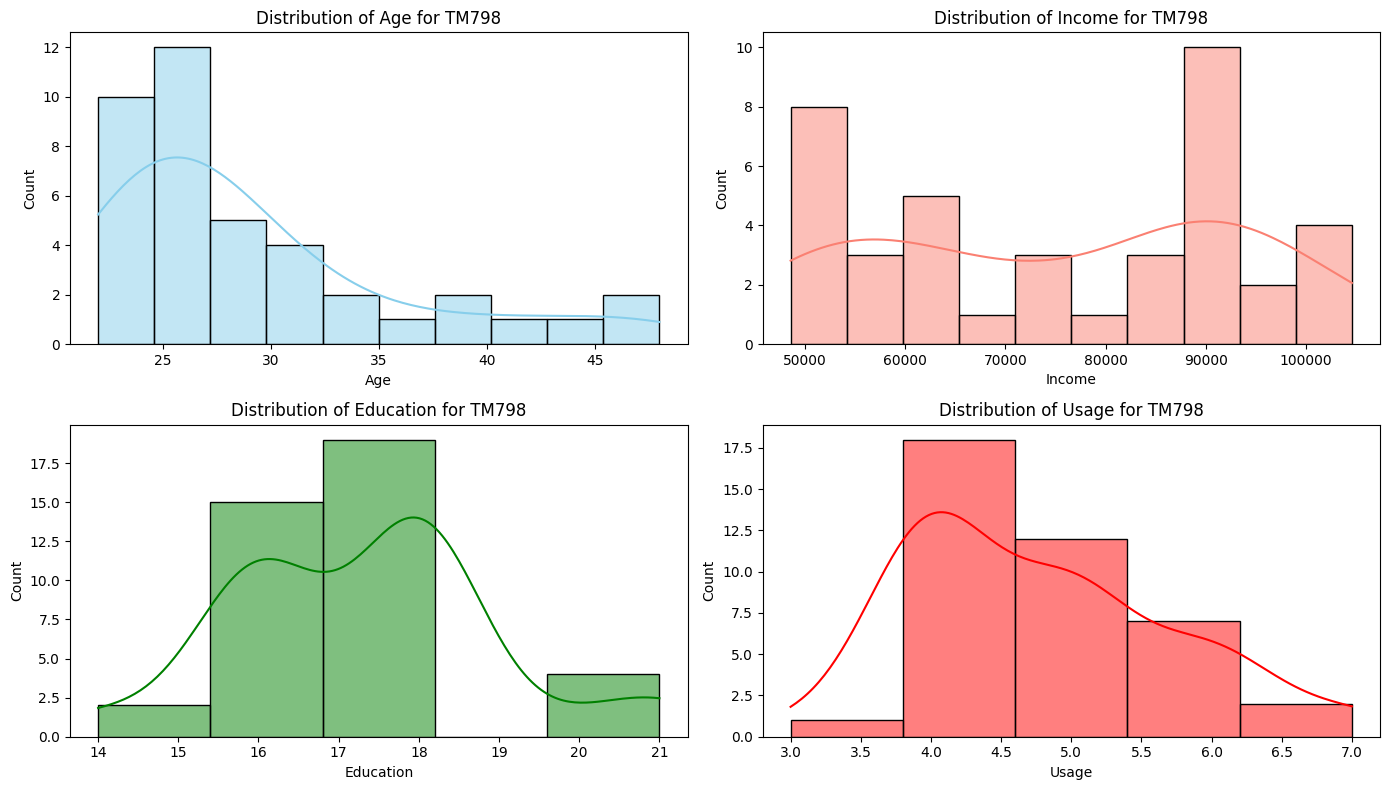

In [125]:
# Step 3: Visualize Data
plt.figure(figsize=(14, 8))

# Example histograms for Age and Income
plt.subplot(2, 2, 1)
sns.histplot(tm798_data['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Age for TM798')

plt.subplot(2, 2, 2)
sns.histplot(tm798_data['Income'], bins=10, kde=True, color='salmon')
plt.title('Distribution of Income for TM798')

plt.subplot(2, 2, 3)
sns.histplot(tm798_data['Education'], bins=5, kde=True, color='green')
plt.title('Distribution of Education for TM798')

plt.subplot(2, 2, 4)
sns.histplot(tm798_data['Usage'], bins=5, kde=True, color='red')
plt.title('Distribution of Usage for TM798')

plt.tight_layout()
plt.show()

# Conclusion
This Notebook contains a descriptive analysis with the aim to create a customer profile.
## Findings
based on the charts above:
* Age Group 20 - 30 are use the trademail the most
* Individuals with an income higher than 50K prefer the TM798 model
* Individuals with an income less than 50K prefer the TM195 and TM498 models
* Education Years doesn't have a significant impact on the type of trademail but individuals with 16 - 18 years of education years tend to use the trademail other than the rest of eduaction years category
* Individuals with partners have a higher tendency of buying a trademail than single individuals
* Gender doesn't have a significant impact but it's noted that males are using the TM798 more than females